<a href="https://colab.research.google.com/github/niranjana2222/Discovering-Potential-Skin-Cancer-Drugs-/blob/main/coconut_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

###Analyze Data####
data = pd.read_csv('/content/coconut.csv')
print(data.describe())
print(data.head())
print("Size", data.shape)

corr = data.corr().abs()
corr2 = corr.unstack()
print(corr2.sort_values(kind="quicksort", ascending=False))
print("Corr\n", corr2.value_counts())

print((data.max()-data.min()).sort_values(kind="quicksort", ascending=False))
print("Range\n", (data.max()-data.min()).value_counts())

print(data.isnull().sum().sort_values(kind="quicksort", ascending=False))
print("Null\n", data.isnull().sum().value_counts().sort_values(kind="quicksort"))


             nAcid        ALogP        ALogp2          AMR         apol  \
count  4898.000000  4898.000000  4.898000e+03  4898.000000  4898.000000   
mean      0.257452    -1.486807  1.927531e+01   100.117082    61.329055   
std       0.693379     4.131368  7.312384e+01    65.963328    49.048028   
min       0.000000   -26.605000  4.000000e-08    18.353900    11.496000   
25%       0.000000    -1.779775  2.793122e-01    49.050025    29.476723   
50%       0.000000    -0.632100  1.329294e+00    91.739700    52.388635   
75%       0.000000     0.429800  4.420086e+00   120.632275    68.453790   
max       8.000000    12.433500  7.078260e+02   553.738300   341.216740   

        naAromAtom    nAromBond        nAtom   nHeavyAtom           nH  ...  \
count  4898.000000  4898.000000  4898.000000  4898.000000  4898.000000  ...   
mean      5.339526     5.444059    55.782360    27.276031    28.506329  ...   
std       5.837993     5.935278    47.675842    20.727068    27.534159  ...   
min     

               counts
unique_values        
1.000000         1863
1.000000           52
1.000000           30
1.000000           30
1.000000           30
...               ...
0.457918            2
0.287364            2
0.337519            2
0.113868            2
0.065877            2

[1331389 rows x 1 columns]


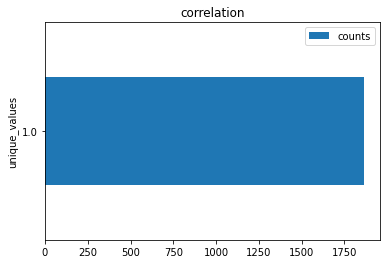

In [2]:
#correlation graph 
corr3 = corr2.value_counts().rename_axis('unique_values').to_frame('counts')
print(corr3)
corr3[:1].plot(kind='barh', title='correlation')

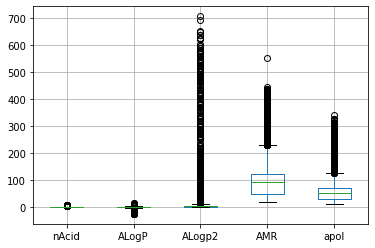

In [3]:
#some descriptor boxplots 
boxplot_nat = data.boxplot(column=['nAcid', 'ALogP', 'ALogp2' , 'AMR' , 'apol'])

In [4]:
#null values
null = data.isnull().sum().value_counts().rename_axis('unique_values').to_frame('counts')
#null.plot(kind='barh')


In [5]:
data = data.dropna(axis=1)
print(data.shape)

(4898, 685)


In [6]:
data = data.dropna()
print(data.shape)

(4898, 685)


In [7]:
"""
#imputer try
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

for col in data.columns:
    if np.inf in set(data[col]):
        print(col, " ", data[col].value_counts())

data = data.replace([np.inf, -np.inf], np.nan)
print(np.any(np.isnan(data)))
print(np.all(np.isfinite(data)))

imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(data)
IterativeImputer(random_state=0)
data2 = imp_mean.transform(data)
print(data2.isnull().sum().sort_values(kind="quicksort", ascending=False))
print("Range\n", (data2.max()-data2.min()).value_counts())
"""


'\n#imputer try\nfrom sklearn.experimental import enable_iterative_imputer  # noqa\nfrom sklearn.impute import IterativeImputer\n\nfor col in data.columns:\n    if np.inf in set(data[col]):\n        print(col, " ", data[col].value_counts())\n\ndata = data.replace([np.inf, -np.inf], np.nan)\nprint(np.any(np.isnan(data)))\nprint(np.all(np.isfinite(data)))\n\nimp_mean = IterativeImputer(random_state=0)\nimp_mean.fit(data)\nIterativeImputer(random_state=0)\ndata2 = imp_mean.transform(data)\nprint(data2.isnull().sum().sort_values(kind="quicksort", ascending=False))\nprint("Range\n", (data2.max()-data2.min()).value_counts())\n'